In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.fftpack import fft
%matplotlib inline

In [15]:
def read_wav_data(filename):
    '''
  读取一个wav文件，返回声音信号的时域谱矩阵和播放时间
    '''
    wav = wave.open(filename, "rb")  # 打开一个wav格式的声音文件流
    num_frame = wav.getnframes()  # 获取帧数
    num_channel = wav.getnchannels()  # 获取声道数
    framerate = wav.getframerate()  # 获取帧速率
    num_sample_width = wav.getsampwidth()  # 获取实例的比特宽度，即每一帧的字节数
    str_data = wav.readframes(num_frame)  # 读取全部的帧
    wav.close()  # 关闭流
    wave_data = np.frombuffer(str_data, dtype=np.short)  # 将声音文件数据转换为数组矩阵形式
    wave_data.shape = -1, num_channel  # 按照声道数将数组整形，单声道时候是一列数组，双声道时候是两列的矩阵
    wave_data = wave_data.T  # 将矩阵转置
    return wave_data, framerate


In [16]:
def wav_show(wave_data, fs):  # 显示出来声音波形
    time = np.arange(0, len(wave_data)) * (1.0 / fs)  # 计算声音的播放时间，单位为秒
    # 画声音波形
    plt.plot(time, wave_data)
    plt.savefig("test2.png")

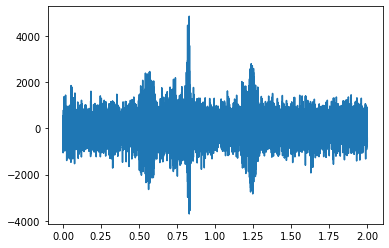

In [17]:
wave_data, fs = read_wav_data("320530_3.wav")
wav_show(wave_data[0], fs)
#wav_show(wave_data[1], fs)  # 如果是双声道则保留这一行，否则删掉这一行

88200
[  7697.            -0.j          52282.63687104+59991.37931121j
 -74768.62602254 +5076.65631139j ...  34148.25325779-65931.5285212j
 -74768.62602254 -5076.65631139j  52282.63687104-59991.37931121j]


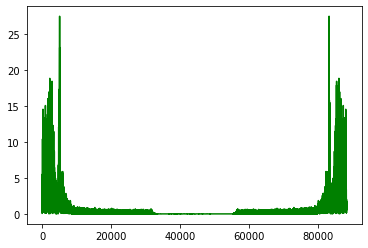

In [18]:
fft_y = fft(wave_data[0])
N = len(fft_y)
x = np.arange(N)
print(N)
print(fft_y)

# 归一化
abs_y = np.abs(fft_y)
norm_y = abs_y/N

plt.figure()
plt.plot(x,norm_y,'g')
plt.show()

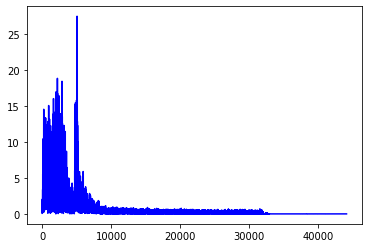

In [19]:

half_x = x[range(int(N/2))]                                  #取一半区间
normalization_half_y = norm_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
plt.figure()
plt.plot(half_x,normalization_half_y,'b')
plt.show()
